In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
%matplotlib inline 

In [4]:
from os import listdir
from os.path import isfile, join, abspath, isdir
from sys import path

In [5]:
module_path = abspath(join('..'))
if module_path not in path:
    path.append(module_path)

In [6]:
from prep.parsing import *
from prep.parser import Parser

/home/yesu/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [7]:
from PIL import Image

Here we explore a bit of the data as well as testing the given code

### Test parser 

In [8]:
root_dir = '/hdd/arterys/final_data'
linkfile = 'link.csv'
dicom_dir = 'dicoms'
contour_dir = 'contourfiles'

In [9]:
!pwd

/home/yesu/PycharmProjects/arterys/notebooks


In [10]:
processed_dir = '/hdd/arterys/processed'

In [11]:
parser = Parser(root_dir, dicom_dir=dicom_dir, contour_dir=contour_dir, 
                linkfile=linkfile, processed_dir=processed_dir)

In [11]:
masks_to_check = parser.parse_all_patients(check_mask=Parser.check_by_intensity)

In [13]:
masks_to_check

[]

#### Read in one image and one mask 

In [11]:
images = listdir(image_dir)

NameError: name 'image_dir' is not defined

In [18]:
filename = images[0]

In [29]:
image = Image.open(join(processed_dir, 'images', filename))

In [34]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

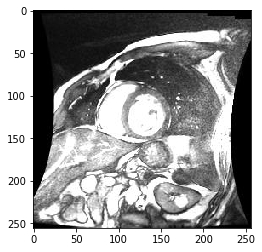

In [30]:
plt.imshow(image);

In [31]:
mask = Image.open(join(processed_dir, 'masks', filename))

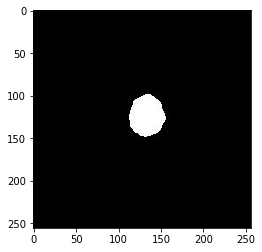

In [32]:
plt.imshow(mask);

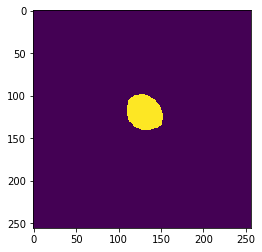

In [17]:
plt.imshow(masks[40,:,:])

In [12]:
path_to_dicoms = '/hdd/arterys/final_data/dicoms/'
path_to_contours = '/hdd/arterys/final_data/contourfiles/'

In [13]:
link_file = '/hdd/arterys/final_data/link.csv'

In [14]:
link = pd.read_csv(link_file)

In [15]:
link.head()

,patient_id,original_id
0,SCD0000101,SC-HF-I-1
1,SCD0000201,SC-HF-I-2
2,SCD0000301,SC-HF-I-4
3,SCD0000401,SC-HF-I-5
4,SCD0000501,SC-HF-I-6


In [16]:
link.shape

(5, 2)

In [17]:
for _, row in link.iterrows():
    print(row['patient_id'])
    break

SCD0000101


### Test read dicom and contour 

In [18]:
contour_path1 = join(path_to_contours, 'SC-HF-I-1/i-contours')

In [19]:
contour_path1

'/hdd/arterys/final_data/contourfiles/SC-HF-I-1/i-contours'

In [20]:
contour_fnames = [join(contour_path1, f) for f in listdir(contour_path1) if isfile(join(contour_path1, f))]

In [21]:
len(contour_fnames)

18

In [22]:
mask_names = listdir(contour_path1)

In [23]:
str(int(mask_names[0].split('-')[2])) + '.dcm'

'48.dcm'

In [94]:
contour_fnames[0]

'/hdd/arterys/final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0048-icontour-manual.txt'

In [161]:
contour_fnames[5]

'/hdd/arterys/final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0208-icontour-manual.txt'

In [173]:
test_contour = parse_contour_file(contour_fnames[0])

In [163]:
test_contouro = parse_contour_file('/hdd/arterys/final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0059-ocontour-manual.txt')

In [80]:
# list of tuples
test_contour

[(120.5, 137.5),
 (120.5, 137.0),
 (121.0, 136.5),
 (121.0, 136.0),
 (121.5, 135.5),
 (121.5, 135.0),
 (122.0, 134.5),
 (122.0, 134.0),
 (122.5, 133.5),
 (123.0, 133.0),
 (123.5, 132.5),
 (124.0, 132.0),
 (124.5, 131.5),
 (125.0, 131.0),
 (125.5, 131.0),
 (126.0, 130.5),
 (126.5, 130.0),
 (127.0, 130.0),
 (127.5, 130.0),
 (128.0, 129.5),
 (128.5, 129.5),
 (129.0, 129.0),
 (129.5, 129.0),
 (130.0, 129.0),
 (130.5, 129.0),
 (131.0, 129.0),
 (131.5, 128.5),
 (132.0, 128.5),
 (132.5, 128.5),
 (133.0, 128.5),
 (133.5, 128.5),
 (134.0, 128.5),
 (134.5, 128.5),
 (135.0, 128.5),
 (135.5, 128.5),
 (136.0, 128.5),
 (136.5, 128.5),
 (137.0, 128.5),
 (137.5, 129.0),
 (138.0, 129.0),
 (138.5, 129.0),
 (139.0, 129.0),
 (139.5, 129.5),
 (140.0, 129.5),
 (140.5, 129.5),
 (141.0, 130.0),
 (141.5, 130.0),
 (142.0, 130.5),
 (142.5, 131.0),
 (143.0, 131.0),
 (143.5, 131.5),
 (144.0, 132.0),
 (144.5, 132.5),
 (145.0, 133.0),
 (145.0, 133.5),
 (145.5, 134.0),
 (145.5, 134.5),
 (146.0, 135.0),
 (146.0, 135.5

In [28]:
dicom_path1 = join(path_to_dicoms, 'SCD0000101/')

In [29]:
dicom_fnames = [join(dicom_path1, f) for f in listdir(dicom_path1) if isfile(join(dicom_path1, f))]

In [30]:
len(dicom_fnames)

240

In [31]:
try:
    no_dicom = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/123333333333333.dcm')
except FileNotFoundError:
    print('no file found')

no file found


In [34]:
# take the dicom with the same number as the contour, 48
test_dicom = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/48.dcm')['pixel_data']

In [35]:
test_dicom.shape

(256, 256)

In [49]:
cv2.imwrite('testsave.jpeg', test_dicom)

True

In [39]:
testsave = cv2.imread('./testsave.jpeg')

In [40]:
type(testsave)

NoneType

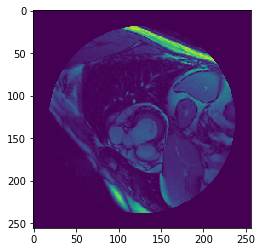

In [41]:
plt.imshow(test_dicom)

In [42]:
Image.fromarray(test_dicom).convert('RGB').save('test.jpeg', mode='jpeg')

In [43]:
testim = cv2.imread('test.jpeg')

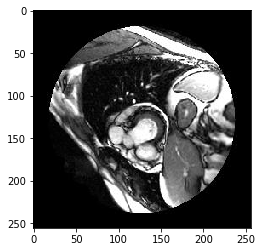

In [44]:
plt.imshow(testim);

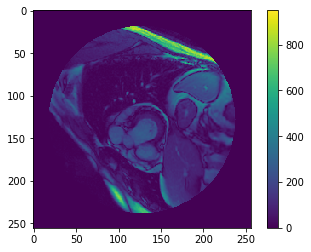

In [45]:
plt.imshow(test_dicom);plt.colorbar();

In [46]:
test_dicom2 = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/79.dcm')['pixel_data']

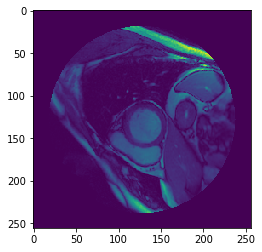

In [47]:
plt.imshow(test_dicom2)

In [48]:
test = parse_dicom_file('/hdd/arterys/final_data/dicoms/SCD0000101/79.dcm')

In [174]:
# test poly to mask
maski = poly_to_mask(test_contour, 256, 256)

In [175]:
masko = poly_to_mask(test_contouro, 256,256)

In [176]:
maski.dtype

dtype('bool')

In [177]:
np.unique(maski)

array([False,  True], dtype=bool)

In [178]:
masko.dtype

dtype('bool')

In [179]:
np.unique(masko)

array([False,  True], dtype=bool)

In [180]:
Image.fromarray(np.uint8(maski)).convert('L').save('./testmask.jpeg')

In [181]:
maskimage = cv2.imread('./testmask.jpeg')

In [182]:
np.unique(maskimage)

array([0, 1], dtype=uint8)

In [128]:
maskimageo = Image.open('./testmasko.jpeg')

In [129]:
np.unique(maskimageo)

array([0, 1, 2], dtype=uint8)

In [124]:
np.unique(np.uint8(masko))

array([0, 1], dtype=uint8)

In [125]:
np.unique(np.uint(maski))

array([0, 1], dtype=uint64)

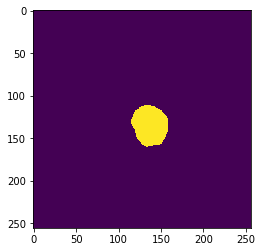

In [127]:
plt.imshow(masko > 0)

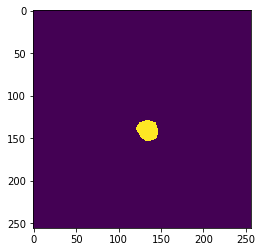

In [51]:
plt.imshow(mask);

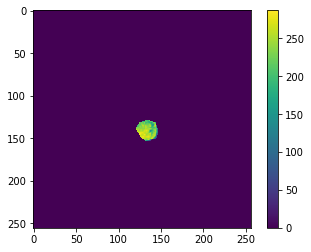

In [52]:
plt.imshow(np.multiply(mask.astype(int), (test_dicom)));plt.colorbar();

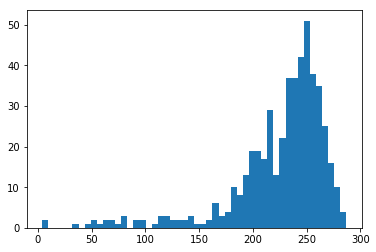

In [66]:
plt.hist(test_dicom[mask], bins = 50);

In [87]:
Image.fromarray(mask).convert('L').save('testmask.bmp')

In [90]:
testmask = Image.open('testmask.bmp')

In [115]:
testmask = Image.fromarray(np.uint8(255*mask))

In [122]:
testmask.convert('RGB').save('testmask.jpeg')

In [123]:
testmask2 = Image.open('testmask.jpeg')

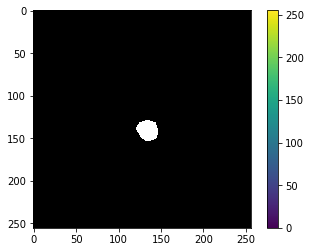

In [124]:
plt.imshow(testmask);plt.colorbar();

In [41]:
np.median(test_dicom[mask])

238.0

In [42]:
np.mean(test_dicom[mask])

225.0020120724346

In [43]:
np.median(test_dicom)

10.0

In [44]:
np.mean(test_dicom)

67.41874694824219

In [45]:
np.max(test_dicom)

950

In [70]:
test_dicom.max()

950

### Keras Generator 

In [143]:
image_gen = ImageDataGenerator()
mask_gen = ImageDataGenerator()

In [144]:
image_dir = join(processed_dir, 'images')

In [151]:
mask_dir = join(processed_dir, 'i_masks')

In [152]:
batchsize = 8

In [153]:
image_generator = image_gen.flow_from_directory(image_dir, class_mode=None, seed=123, batch_size=batchsize, color_mode='grayscale')
mask_generator = mask_gen.flow_from_directory(mask_dir, class_mode=None, seed=123, batch_size=batchsize, color_mode='grayscale')

Found 96 images belonging to 1 classes.
Found 96 images belonging to 1 classes.


In [154]:
train_generator = zip(image_generator, mask_generator)

In [155]:
images, masks = next(train_generator)

In [156]:
images.shape

(8, 256, 256, 1)

In [157]:
masks.shape

(8, 256, 256, 1)

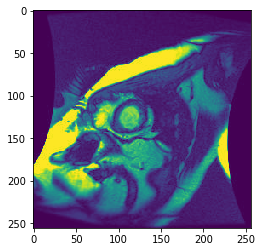

In [158]:
plt.imshow(images[3,:,:,0])

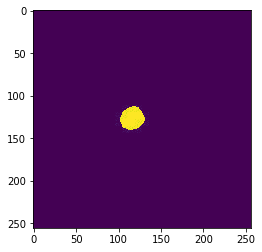

In [159]:
plt.imshow(masks[3,:,:,0])

In [160]:
np.unique(masks[3,:,:,0])

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   22.,   23.,   25.,   27.,   28.,  218.,
        228.,  231.,  232.,  233.,  234.,  235.,  236.,  239.,  240.,
        241.,  242.,  243.,  244.,  245.,  246.,  247.,  248.,  249.,
        250.,  251.,  252.,  253.,  254.,  255.], dtype=float32)